# Regresión Lineal

La regresión lineal es un método de aprendizaje automático supervisado que busca encontrar la relación entre una o más variables independientes (predictoras) y una variable dependiente (predecida). La relación se expresa mediante una ecuación lineal de la forma:

$$
y = b_0 + b_1x_1 + b_2x_2 + … + b_nx_n
$$

Donde y es la variable dependiente, x1, x2, …, xn son las variables independientes, y b0, b1, b2, …, bn son los coeficientes que se estiman a partir de los datos. El objetivo es minimizar el error cuadrático medio entre los valores reales y los predichos por el modelo.

In [1]:
# Importamos las librerias necesarias
import numpy as np # Algebra lineal
import matplotlib.pyplot as plt # Graficos
import pandas as pd # Procesamiento de datos
import seaborn as sns # Graficos estadisticos

from sklearn.linear_model import LinearRegression # Regresion Lineal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Metricas de evaluacion
from sklearn.model_selection import train_test_split # Particion de datos

In [2]:
# Cargamos el dataset
data_frame = pd.read_csv('docs/insurance.csv') # Cargamos el dataset
data_frame # Mostramos el dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Predicción de gastos médicos

Text(0.5, 1.0, 'Correlación de Variables')

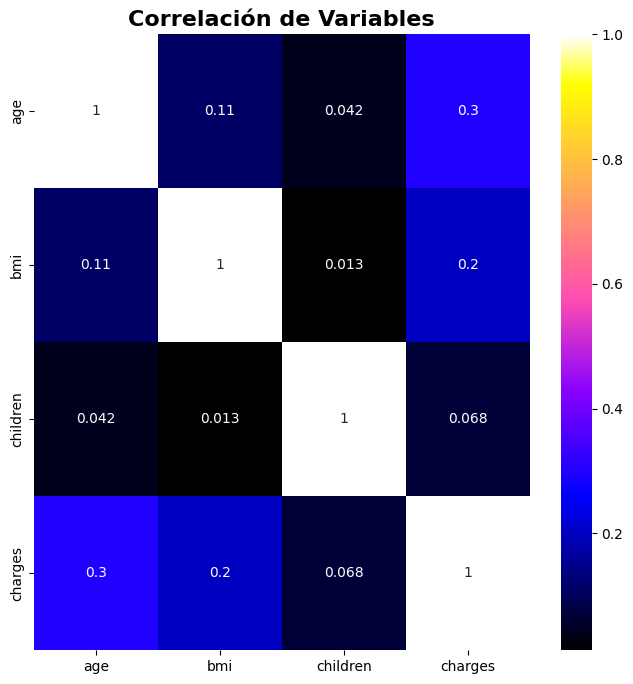

In [5]:
# Creación de un mapa de calor para ver la correlación entre las variables
f, ax = plt.subplots(1, 1, figsize=(8, 8)) # Creamos la figura. 1 fila, 1 columna, tamaño 8x8
ax = sns.heatmap(data_frame[data_frame.describe().columns].corr(), annot=True, cmap='gnuplot2') # Creamos el mapa de calor. El metodo corr() calcula la correlacion entre las variables
plt.title("Correlación de Variables", fontsize=16, fontweight="bold") # Titulo del grafico

---
**Análisis**

---
Considerando la variable objetivo (charges) es posible apreciar que las variables de edad e índice de masa corporal son las que mayor correlación positiva presentan; por ende, pueden ser buenas variables predictoras.

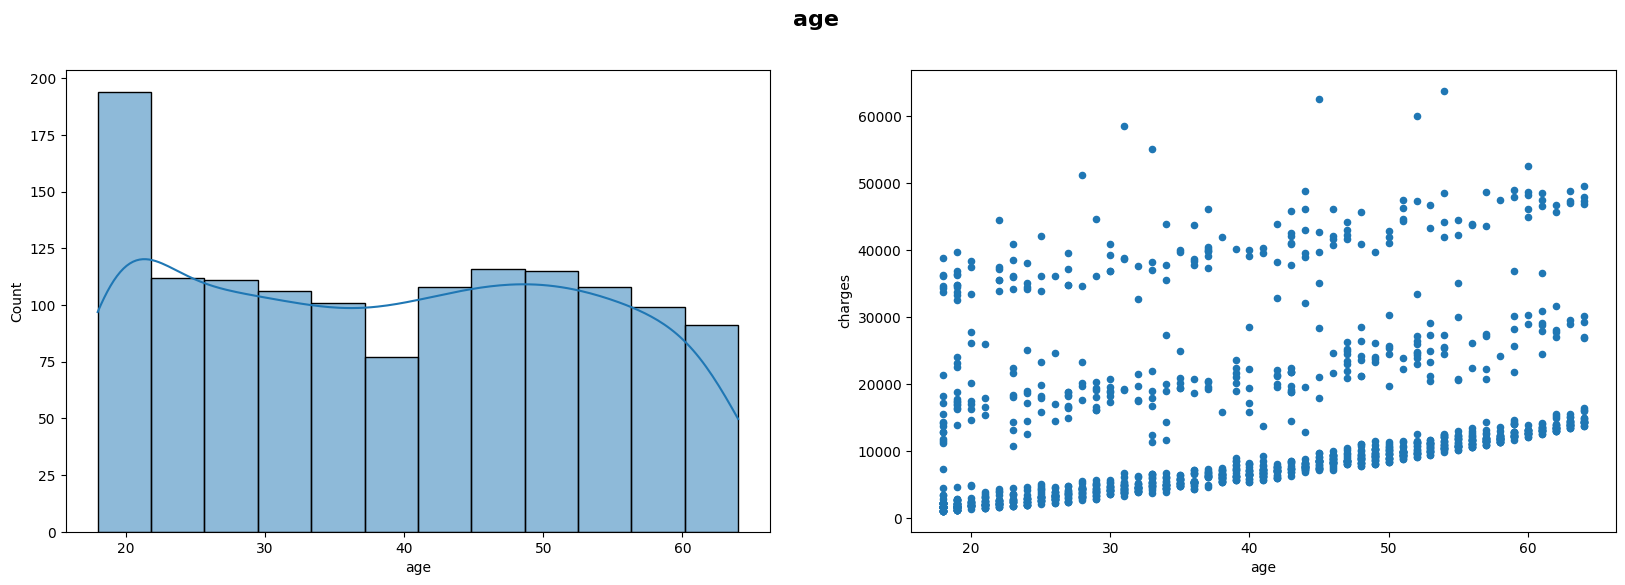

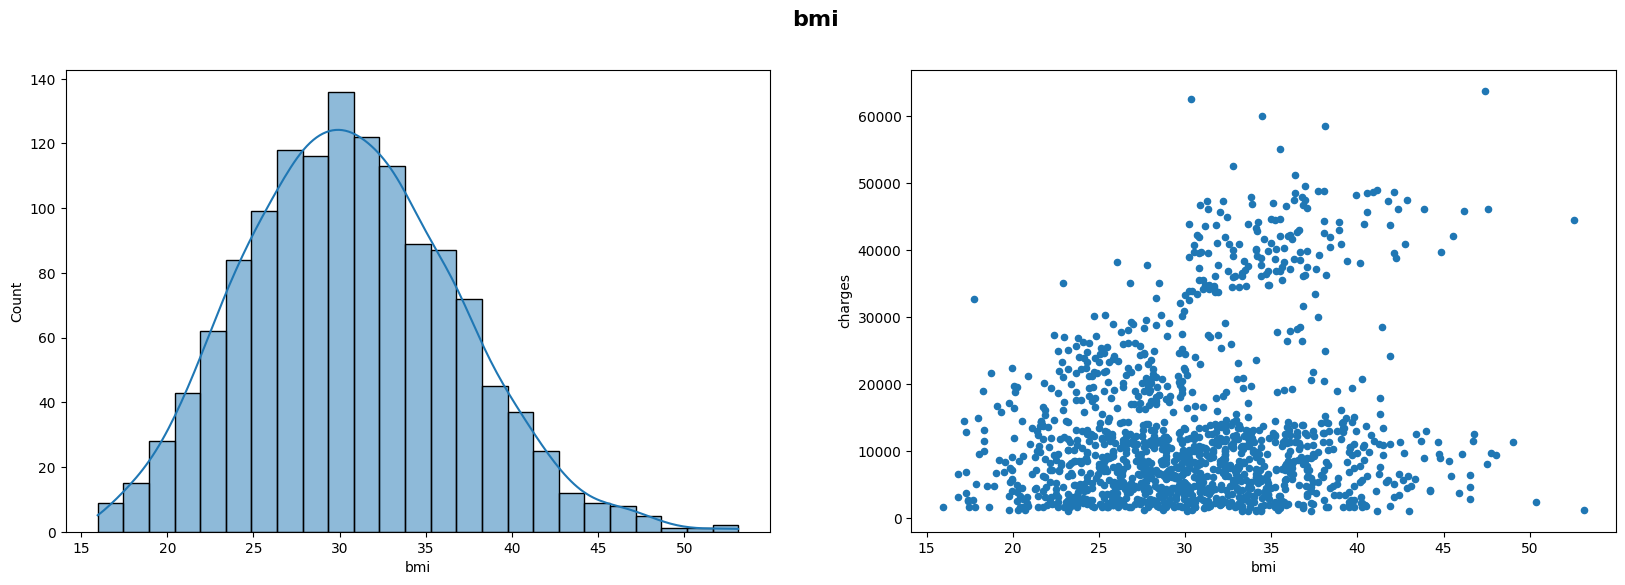

In [7]:
# Generar histogramas y diagramas de dispersion para las variables Age y bmi (Edad y IMC)
for col in ["age", "bmi"]:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6)) # Creamos la figura. 1 fila, 2 columnas, tamaño 20x6
    fig.suptitle(col, fontsize=16, fontweight="bold") # Titulo del grafico
    sns.histplot(data_frame[col], ax=ax[0], kde=True) # Histograma
    data_frame[[col] + ["charges"]].plot.scatter(x=col, y="charges", ax=ax[1]) # Diagrama de dispersion
    plt.show() # Mostramos el grafico

## Predicción de los gastos médicos considerando la edad y el IMC

In [8]:
# Separar las variables predictoras y la variable a predecir
x = data_frame[["age", "bmi"]] # Variables predictoras
y = data_frame["charges"] # Variable a predecir

In [9]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [13]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.1172
MSE: 137288437.5596
MAE: 9422.0369
Score del modelo en entrenamiento: 0.1146
Score del modelo en prueba: 0.1172


**Conclusiones**

+ Se obtiene un $R^{2}$ de 0.11 que no es suficiente, se tratará de mejorar
+ La mejora considera la incorporación de las variables categóricas que se encuentran en el conjunto de datos (sexo y la condición de fumador)

In [14]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae = []
history_mae.append(mean_absolute_error(y_test, y_pred))

In [16]:
# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2 = []
history_r2.append(model.score(x_train, y_train))